# Titanic:Machine Learning From Disaster

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

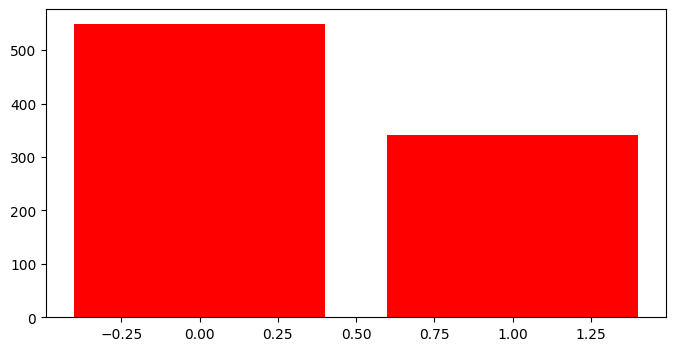

In [6]:
plt.figure(figsize=(8,4))
plt.bar(list(df_train['Survived'].value_counts().keys()),list(df_train['Survived'].value_counts()),color='r')

In [7]:
df_train['Pclass'].value_counts().sort_values()

2    184
1    216
3    491
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

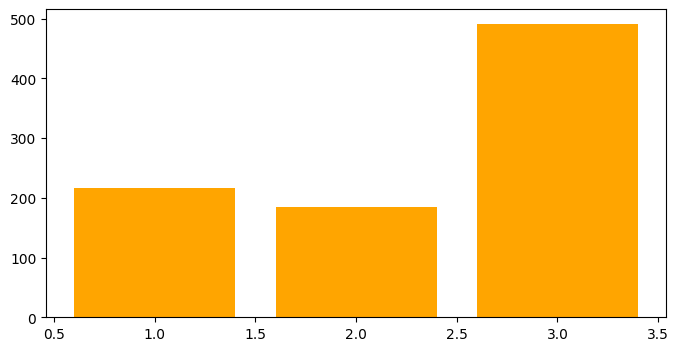

In [8]:
plt.figure(figsize=(8,4))
plt.bar(list(df_train['Pclass'].value_counts().keys()),list(df_train['Pclass'].value_counts()),color='orange')

In [9]:
df_train['Sex'].value_counts().sort_values()

female    314
male      577
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

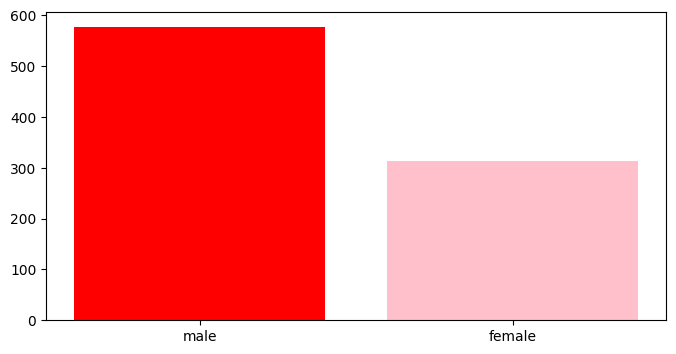

In [10]:
plt.figure(figsize=(8,4))
plt.bar(list(df_train['Sex'].value_counts().keys()),list(df_train['Sex'].value_counts()),color=['red','pink'])

In [11]:
df_train['Age'].value_counts().sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       20, 22, 23, 24, 25, 26, 27, 30], dtype=int64)

In [12]:
df_train['Age'].value_counts().sort_values()

74.00     1
34.50     1
0.42      1
0.67      1
66.00     1
         ..
28.00    25
19.00    25
18.00    26
22.00    27
24.00    30
Name: Age, Length: 88, dtype: int64

Text(0.5, 0, 'Age')

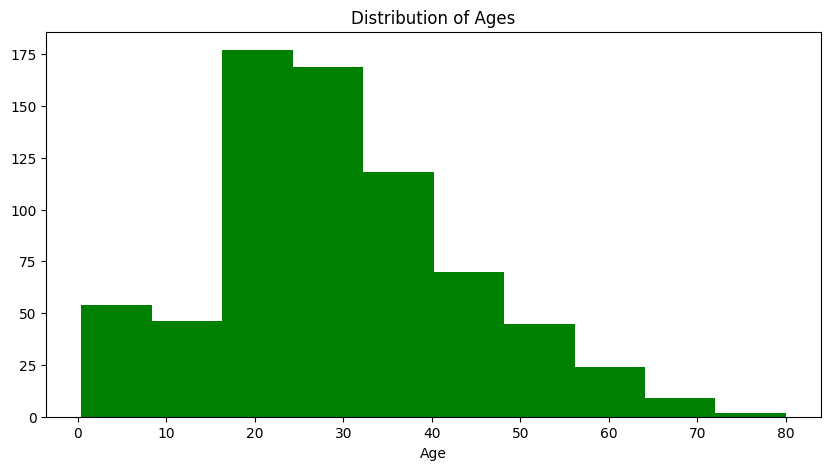

In [13]:
plt.figure(figsize=(10,5))
plt.hist(df_train['Age'],color='Green')
plt.title("Distribution of Ages")
plt.xlabel("Age")

In [14]:
df_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [15]:
df_train['Survived'].isnull().sum()

0

In [16]:
df_train['Sex'].isnull().sum()

0

In [17]:
df_train['Pclass'].isnull().sum()

0

In [18]:
df_train['Age'].isnull().sum()

177

In [19]:
df_train.dropna(subset=['Age'], inplace=True)


In [20]:
df_train['Age'].isnull().sum()

0

In [21]:
x_train=df_train[['Age']]
y_train=df_train[['Survived']]

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc= DecisionTreeClassifier()

In [24]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
df_test["Age"].isnull().sum()

86

In [26]:
df_test.dropna(subset=['Age'], inplace=True)


In [27]:
x_test=df_test[["Age"]]
y_pred=dtc.predict(x_test)

In [28]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,